# Recreate turtle with matplotlib
Based on:
- https://github.com/jorenham/numpy_turtle
- https://docs.python.org/3/library/turtle.html
- https://github.com/python/cpython/blob/3.12/Lib/turtle.py

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"

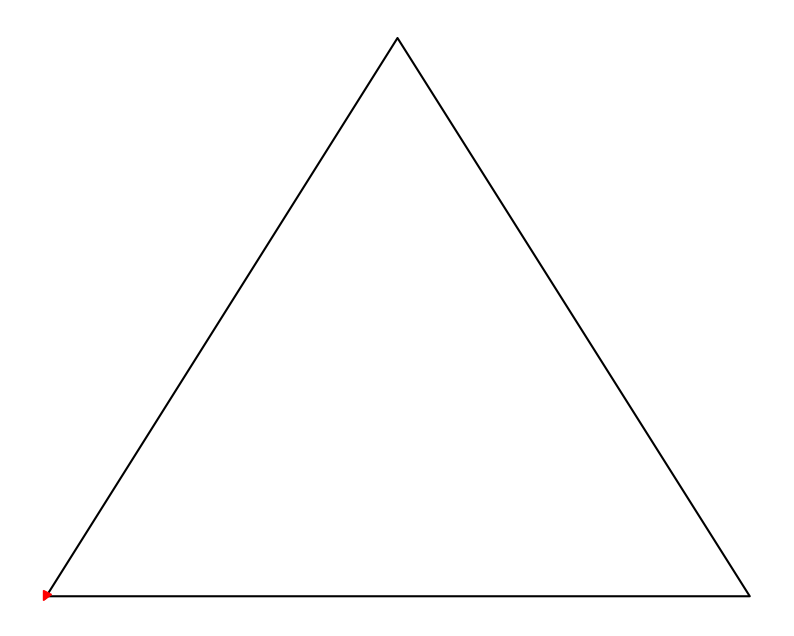

In [82]:
class MplTurtle():
    def __init__(self):
        """Build a array using turtle graphics movement.
        Starts at (0, 0) with a direction of 0 (pointing up).
        """
        self.__direction = 0
        self.__x = 0
        self.__y = 0
        self.__x_stack = [self.__x]
        self.__y_stack = [self.__y]
        self.__dir_stack = [self.__direction]

    def forward(self, distance):
        """Move in the current direction and draw a line with Euclidian
        distance.
        """
        new_x = self.__x + distance * math.cos(self.__direction)
        new_y = self.__y + distance * math.sin(self.__direction)

        self.__x_stack.append(new_x)
        self.__y_stack.append(new_y)

        self.__x = int(new_x)
        self.__y = int(new_y)

    def rotate(self, angle):
        """Rotate the turtle by a given angle in degrees.
        Positive rotates left/counterclockwise, negative right/clockwise.
        Convert angle to radians to work with cos and sin
        """
        angle_rad = math.radians(angle)
        self.__direction += angle_rad % math.tau
        self.__dir_stack.append(self.__direction)

    @property
    def direction(self):
        """Get the current direction in degrees."""
        return math.degrees(self.__direction)

    @property
    def position(self):
        """Current x and y position."""
        return self.__x, self.__y

    def draw(self, *args, **kwargs):
        """Draw a static matplolib object"""

        plt.figure(*args, **kwargs)
        plt.plot(self.__x_stack, self.__y_stack, marker=None, color="black")

        m = mpl.markers.MarkerStyle(marker=">")
        m._transform = m.get_transform().rotate_deg(self.direction)
        plt.plot(self.__x, self.__y, marker=m, color="red")
        plt.axis('off')
        plt.show()

    def animate(self, *args, **kwargs):
        """Draw a animated matplotlib object"""

        fig, ax = plt.subplots(*args, **kwargs)
        ax.axis([
            min(self.__x_stack)*1.05,
            max(self.__x_stack)*1.05,
            min(self.__y_stack)*1.05,
            max(self.__y_stack)*1.05
        ])
        l, = ax.plot([0],[0], marker=None, color="black")
        mk = mpl.markers.MarkerStyle(marker=">")
        mk._transform = mk.get_transform().rotate_deg(0)
        m, = ax.plot([0],[0], marker=mk, color="red")
        
        def animate(i):
            ax.cla()

            ax.axis([
                min(self.__x_stack)*1.05,
                max(self.__x_stack)*1.05,
                min(self.__y_stack)*1.05,
                max(self.__y_stack)*1.05
            ])

            ax.plot(self.__x_stack[:i+1], self.__y_stack[:i+1], marker=None, color="black")
            mk._transform = mk.get_transform().rotate_deg(self.__dir_stack[i:i+1][0])
            ax.plot(self.__x_stack[i:i+1], self.__y_stack[i:i+1], marker=mk, color="red")
            
            # l.set_data(self.__x_stack[:i+1], self.__y_stack[:i+1])
            # mk._transform = mk.get_transform().rotate_deg(self.__dir_stack[i:i+1][0])
            # m.set_data(self.__x_stack[i:i+1], self.__y_stack[i:i+1], marker=mk)
        
        ani = matplotlib.animation.FuncAnimation(
            fig,
            func=animate,
            frames=len(self.__x_stack),
            interval=200,
            repeat=False
        )
        plt.axis('off')
        plt.close()
        return ani


turtle = MplTurtle()

turtle.forward(300)
turtle.rotate(120)
turtle.forward(300)
turtle.rotate(120)
turtle.forward(300)

turtle.draw(figsize=(10, 8))

In [83]:
turtle2 = MplTurtle()

for i in range(0, 400, 20):
    turtle2.forward(i)
    turtle2.rotate(90)

# turtle2.draw()
turtle2.animate()